# Feature Analysis for the Expedia project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   

training_data = pd.DataFrame.from_csv('data/train.csv').reset_index()

### NaN Rate for certain feature

In [2]:
def nanrate(train, valname):
    ## train, the dataset name
    ## valname, the feature name to study
    #print(train[valname].describe())
    train[valname+"_na"] = pd.isnull(train[valname])
    book_rate=[]
    click_rate=[]
    c_summary=[]
    b_summary=[]
    cond = []
    for i, gb in train.groupby(valname+"_na"):
        if i:
            cond.append(1)
            print('non_NaN value click summary:')
            print(gb["click_bool"].describe())
            print('non_NaN value booking summary:')
            print(gb["booking_bool"].describe())
        else:
            cond.append(0)
            print('NaN value click summary:')
            print(gb["click_bool"].describe())
            print('NaN value booking summary:')
            print(gb["booking_bool"].describe())
        book_rate.append(gb["booking_bool"].mean())
        click_rate.append(gb["click_bool"].mean())
        c_summary.append(gb["click_bool"].describe())
        b_summary.append(gb["booking_bool"].describe())
    df = pd.DataFrame(np.array([cond, click_rate, book_rate]), index=["Condition","Click Rate", "Book Rate"])
    df = df.transpose()
    #print(df)
    df.plot( x="Condition",kind="bar")
    locs, labels = plt.xticks()
    plt.xticks(locs, ["Not NULL", "NULL"], size='small', rotation='horizontal')
    plt.title("NaN rate wrt: "+valname+" feature.")
    plt.show()

### Influence of featrues to click and booking rate

### P.S. Part of the feature are investigated here

In [3]:
def ratedist(train, name, steps, navalue):
    ## train, dataset name
    ## name, the feature name
    ## steps, the interval size we are going to split the feature data with
    ## navalue, a special value for the na samples, can be -1, or -100
    print("Here the NaN values are classed as "+str(navalue))
    train[name+"_step"] = np.round(train[name]/steps)
    train[name+"_step"][pd.isnull(train[name])] = navalue
    rate_list = []
    c_per_list = []
    b_per_list = []
    for rate, gp in train.groupby(name+"_step"):
        rate_list.append(rate)
        c_per_list.append(1.0*gp["click_bool"].mean())
        b_per_list.append(1.0*gp["booking_bool"].mean())
    df = pd.DataFrame(np.array([rate_list, c_per_list, b_per_list]), index=["classes","click_per_class", "book_per_class"])
    df = df.transpose()
    df.plot(x="classes", y="click_per_class", kind="bar")
    plt.title("Click rate wrt. "+name)
    plt.show()
    df.plot(x="classes", y="book_per_class", kind="bar")
    plt.title("Booking rate wrt. "+name)
    plt.show()

### Feature Analysis

##### 1. 'visitor_hist_adr_usd' feature

NaN value click summary:
count    507612.000000
mean          0.044296
std           0.205751
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: click_bool, dtype: float64
NaN value booking summary:
count    507612.000000
mean          0.035988
std           0.186261
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: booking_bool, dtype: float64
non_NaN value click summary:
count    9409918.000000
mean           0.044760
std            0.206776
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000
Name: click_bool, dtype: float64
non_NaN value booking summary:
count    9409918.000000
mean           0.027452
std            0.163398
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000
Name: booking_bool, dtype: float64


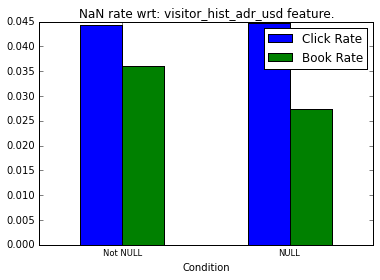

In [4]:
nanrate(training_data, 'visitor_hist_adr_usd')

Here the NaN values are classed as -1


//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


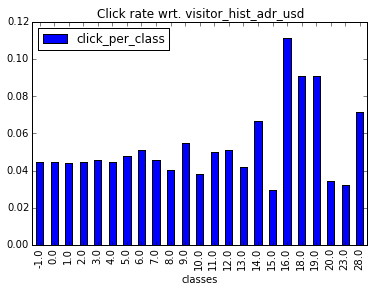

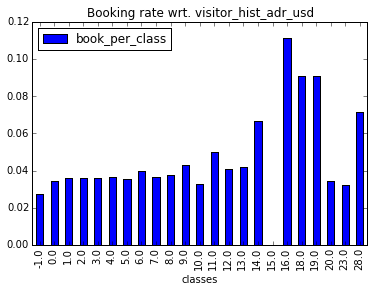

In [5]:
ratedist(training_data, "visitor_hist_adr_usd", 100, -1)

We can see from the figures that the distribution of click and booking is similar, and the samples with NaN value seem to have the same rate as most non-NaN samples.

Here we apply median value to replace NaN values.

#### 2. 'visitor_hist_starrating' feature

NaN value click summary:
count    505297.000000
mean          0.044283
std           0.205723
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: click_bool, dtype: float64
NaN value booking summary:
count    505297.000000
mean          0.035989
std           0.186262
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: booking_bool, dtype: float64
non_NaN value click summary:
count    9412233.000000
mean           0.044760
std            0.206778
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000
Name: click_bool, dtype: float64
non_NaN value booking summary:
count    9412233.000000
mean           0.027454
std            0.163404
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000
Name: booking_bool, dtype: float64


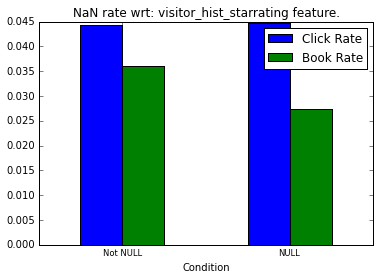

In [6]:
nanrate(training_data, 'visitor_hist_starrating')

Here the NaN values are classed as -1


//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


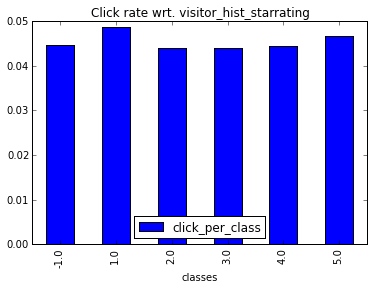

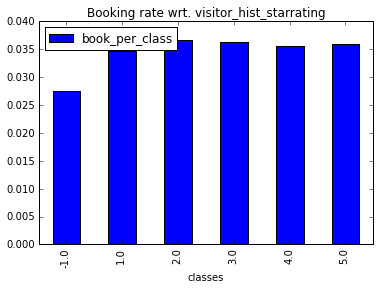

In [7]:
ratedist(training_data, "visitor_hist_starrating", 1, -1)

We can see from the figure that different hist star ratings seem to have no significant influence on either booking rate or click rate. The samples with NaN value have the same clicking rate and a little lower booking rate.

Here we apply mean value to replace NaN values.

#### 3. 'prop_review_score' feature 

NaN value click summary:
count    9902900.000000
mean           0.044752
std            0.206758
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000
Name: click_bool, dtype: float64
NaN value booking summary:
count    9902900.000000
mean           0.027906
std            0.164704
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000
Name: booking_bool, dtype: float64
non_NaN value click summary:
count    14630.000000
mean         0.034176
std          0.181688
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: click_bool, dtype: float64
non_NaN value booking summary:
count    14630.000000
mean         0.016541
std          0.127549
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: booking_bool, dtype: float64


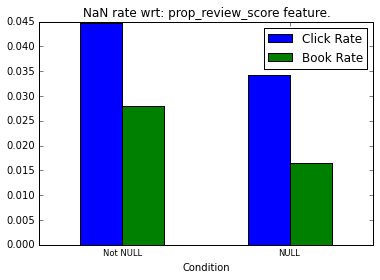

In [8]:
nanrate(training_data, 'prop_review_score')

Here the NaN values are classed as -1


//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


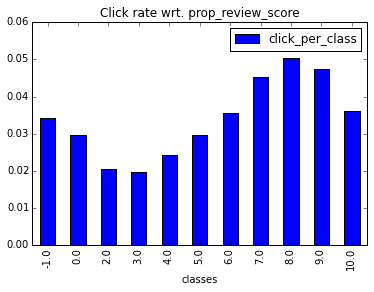

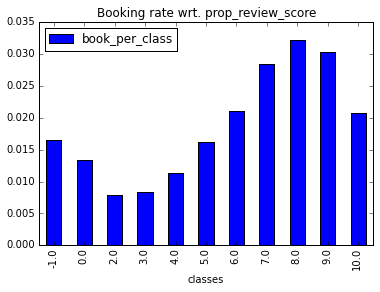

In [9]:
ratedist(training_data, "prop_review_score", 0.5, -1)

From the figures we can easily find that samples with NaN values have lower booking and click rate against other sample. Also, from the distribution figures, NaN values is similar to the samples with 2.5-3.0 review score and samples with 0 values is similar to the samples with about 2.5 review score.

So, here we assign NaN values with 3.0 and 0 values with 2.0.

#### 4. 'prop_location_score2' feature 

NaN value click summary:
count    7739150.000000
mean           0.050503
std            0.218980
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000
Name: click_bool, dtype: float64
NaN value booking summary:
count    7739150.000000
mean           0.032010
std            0.176027
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000
Name: booking_bool, dtype: float64
non_NaN value click summary:
count    2178380.000000
mean           0.024250
std            0.153823
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000
Name: click_bool, dtype: float64
non_NaN value booking summary:
count    2178380.000000
mean           0.013249
std            0.114339
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000
Name: booking_bool,

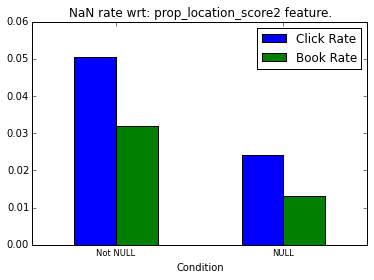

In [10]:
nanrate(training_data, 'prop_location_score2')

Here the NaN values are classed as -1


//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


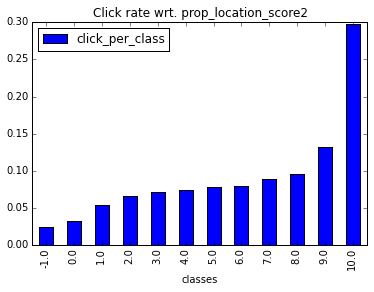

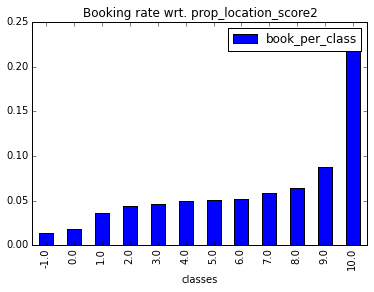

In [11]:
ratedist(training_data, "prop_location_score2", 0.1, -1)

We can see from the nanrate figure that samples with NaN value have lower booking and click rate than other samples. From the rate distribution figure, the samples with NaN value have the lowest rate among all the data.

Therefore, we replace NaN value with 0.

#### 5. 'srch_query_affinity_score' feature

NaN value click summary:
count    635564.000000
mean          0.044221
std           0.205585
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: click_bool, dtype: float64
NaN value booking summary:
count    635564.000000
mean          0.034105
std           0.181499
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: booking_bool, dtype: float64
non_NaN value click summary:
count    9281966.000000
mean           0.044771
std            0.206802
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000
Name: click_bool, dtype: float64
non_NaN value booking summary:
count    9281966.000000
mean           0.027464
std            0.163430
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000
Name: booking_bool, dtype: float64


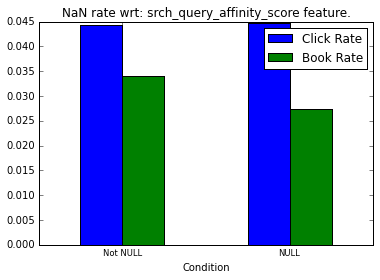

In [12]:
nanrate(training_data, 'srch_query_affinity_score')

In [13]:
training_data["srch_query_affinity_score_exp"] = np.exp(training_data["srch_query_affinity_score"])

Here the NaN values are classed as -1


//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


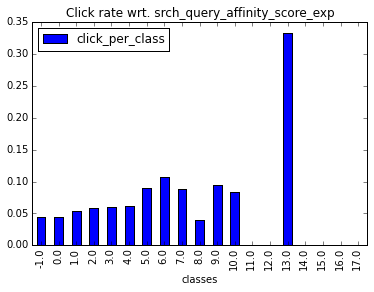

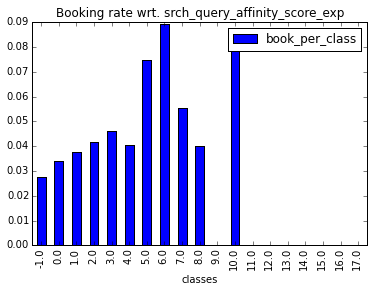

In [14]:
ratedist(training_data, "srch_query_affinity_score_exp", 0.005, -1)

From the figure, we can see that samples with NaN value have the lowest rate among the entire dataset.

Thus, here we assign NaN value with 25% value(-31).

#### 6. 'prop_log_historical_price' 

In [15]:
training_data.loc[ (training_data.prop_log_historical_price==0), 'prop_log_historical_price'] = np.nan

NaN value click summary:
count    8487103.000000
mean           0.044807
std            0.206880
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000
Name: click_bool, dtype: float64
NaN value booking summary:
count    8487103.000000
mean           0.027879
std            0.164625
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000
Name: booking_bool, dtype: float64
non_NaN value click summary:
count    1430427.000000
mean           0.044316
std            0.205797
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000
Name: click_bool, dtype: float64
non_NaN value booking summary:
count    1430427.000000
mean           0.027952
std            0.164835
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000
Name: booking_bool,

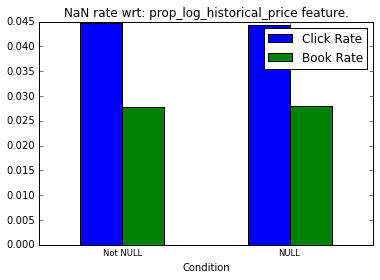

In [16]:
nanrate(training_data, 'prop_log_historical_price')

In [17]:
training_data['prop_log_historical_price_exp'] = np.exp(training_data['prop_log_historical_price'])

Here the NaN values are classed as -1


//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


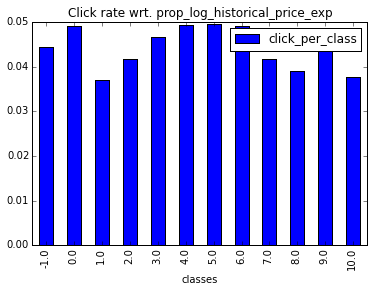

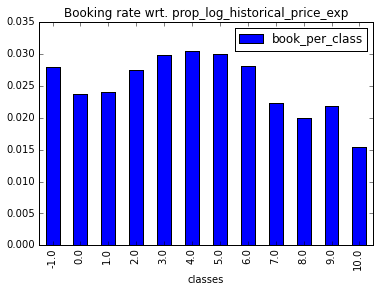

In [18]:
ratedist(training_data, "prop_log_historical_price_exp", 50, -1)

We can see from the figure that samples with 0 value have no significant influence on booking or click rate. In the rate distribution figure, different class of values have similar rate.

So, here we replace 0 value with median value of prop_log_historical_price feature.

#### 7. All Competitor features

Here the NaN values are classed as -2


//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


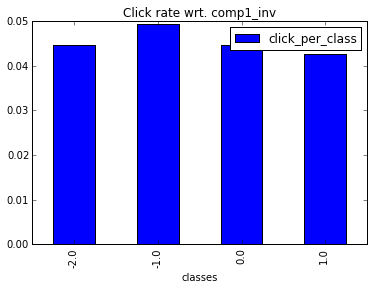

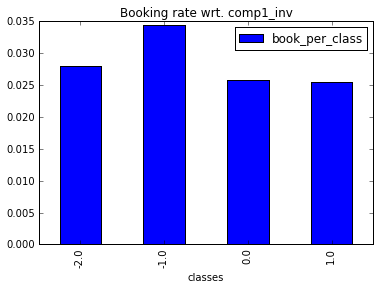

Here the NaN values are classed as -2


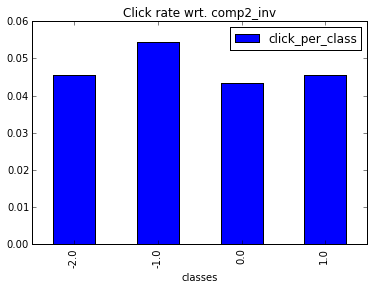

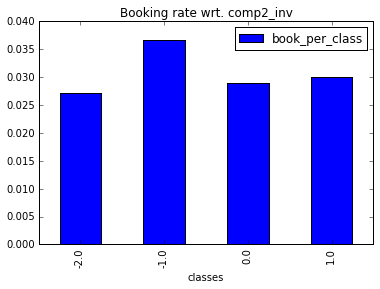

Here the NaN values are classed as -2


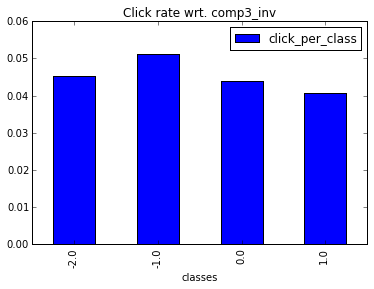

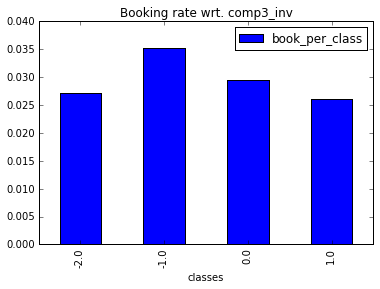

Here the NaN values are classed as -2


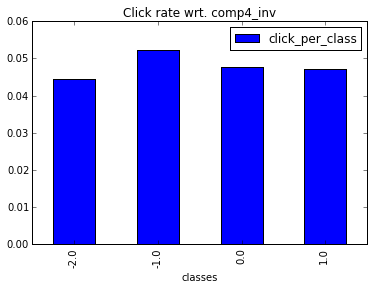

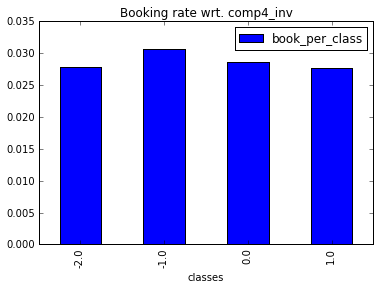

Here the NaN values are classed as -2


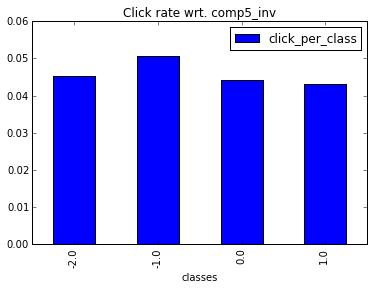

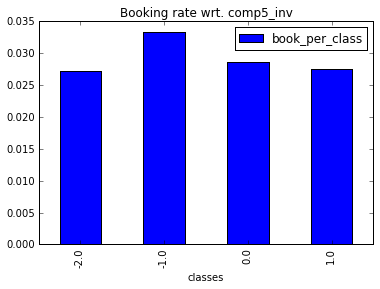

Here the NaN values are classed as -2


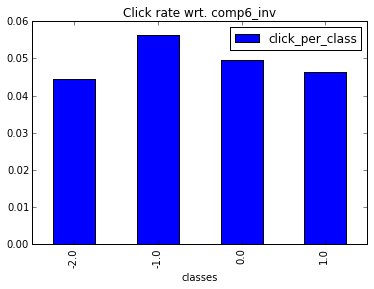

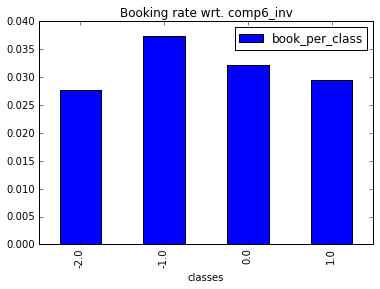

Here the NaN values are classed as -2


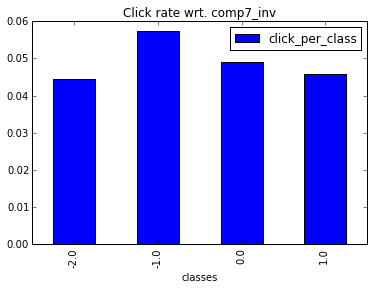

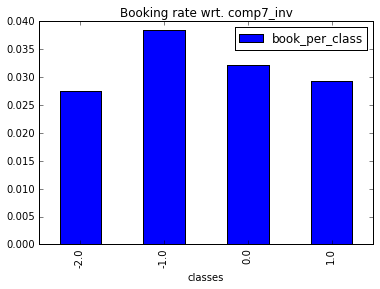

Here the NaN values are classed as -2


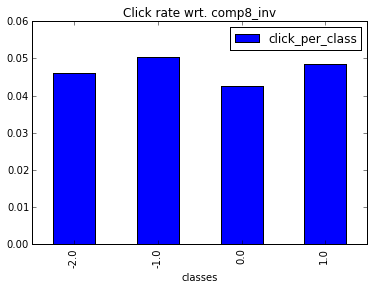

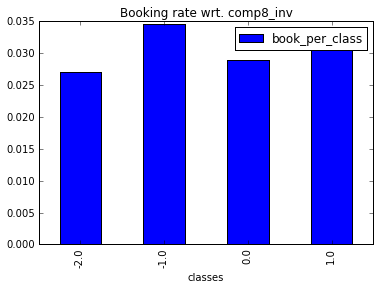

Here the NaN values are classed as -2


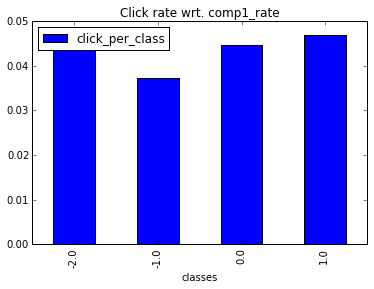

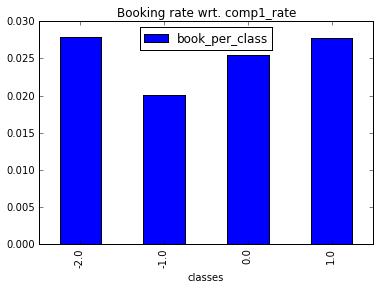

Here the NaN values are classed as -2


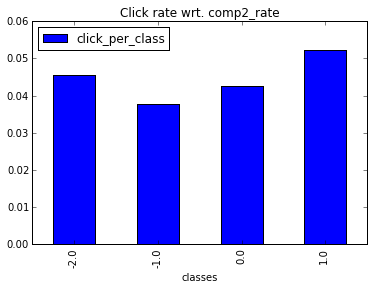

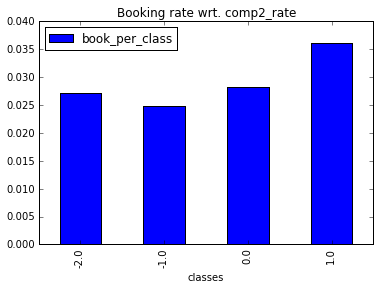

Here the NaN values are classed as -2


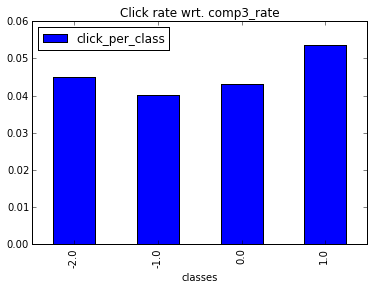

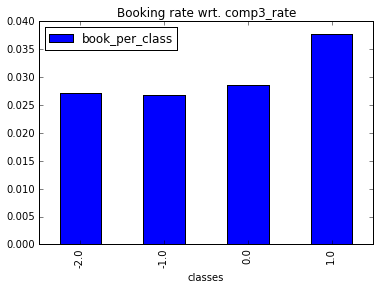

Here the NaN values are classed as -2


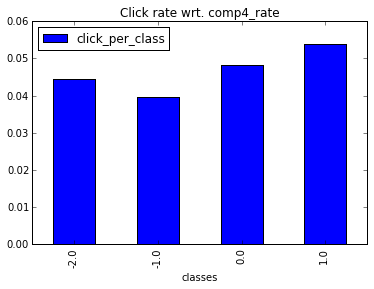

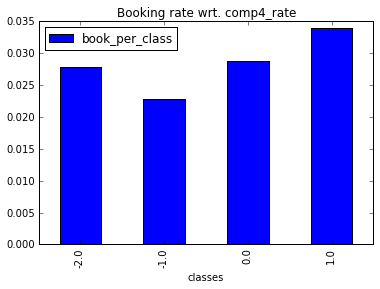

Here the NaN values are classed as -2


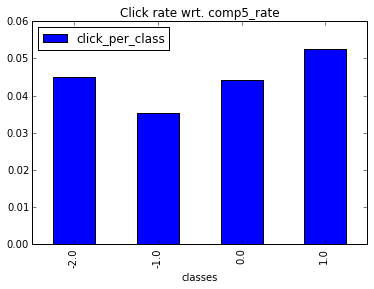

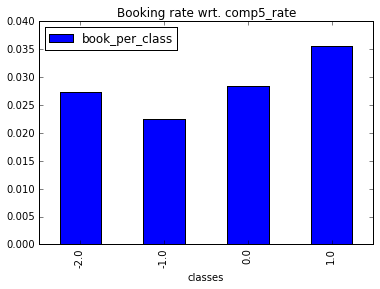

Here the NaN values are classed as -2


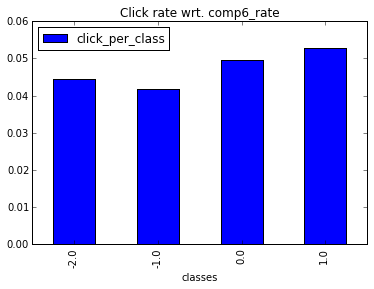

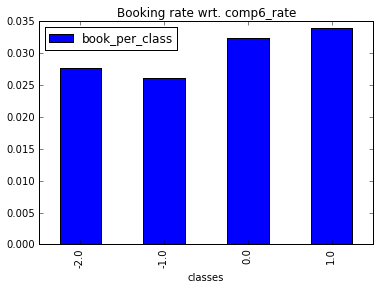

Here the NaN values are classed as -2


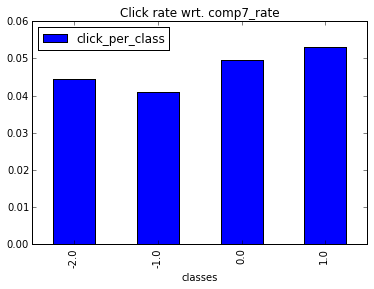

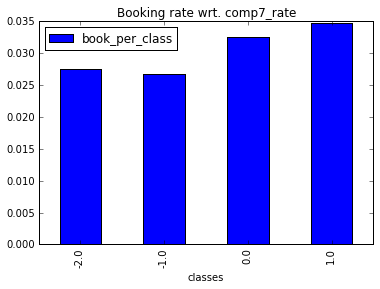

Here the NaN values are classed as -2


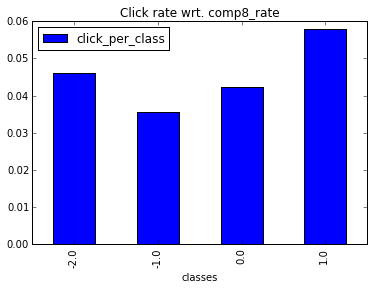

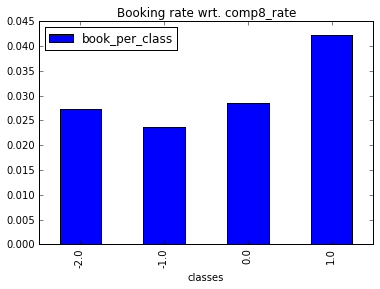

In [19]:
ratedist(training_data, "comp1_inv", 1, -2)
ratedist(training_data, "comp2_inv", 1, -2)
ratedist(training_data, "comp3_inv", 1, -2)
ratedist(training_data, "comp4_inv", 1, -2)
ratedist(training_data, "comp5_inv", 1, -2)
ratedist(training_data, "comp6_inv", 1, -2)
ratedist(training_data, "comp7_inv", 1, -2)
ratedist(training_data, "comp8_inv", 1, -2)
ratedist(training_data, "comp1_rate", 1, -2)
ratedist(training_data, "comp2_rate", 1, -2)
ratedist(training_data, "comp3_rate", 1, -2)
ratedist(training_data, "comp4_rate", 1, -2)
ratedist(training_data, "comp5_rate", 1, -2)
ratedist(training_data, "comp6_rate", 1, -2)
ratedist(training_data, "comp7_rate", 1, -2)
ratedist(training_data, "comp8_rate", 1, -2)


In [20]:
training_data['sum_comp_rate'] = (training_data.comp1_rate.fillna(0) + training_data.comp2_rate.fillna(0) + \
                         training_data.comp3_rate.fillna(0) + training_data.comp4_rate.fillna(0) + \
                         training_data.comp5_rate.fillna(0) + training_data.comp6_rate.fillna(0) + \
                         training_data.comp7_rate.fillna(0) + training_data.comp8_rate.fillna(0)).astype(int)
training_data['sum_comp_inv'] = (training_data.comp1_inv.fillna(0) + training_data.comp2_inv.fillna(0) + \
                        training_data.comp3_inv.fillna(0) + training_data.comp4_inv.fillna(0) + \
                        training_data.comp5_inv.fillna(0) + training_data.comp6_inv.fillna(0) + \
                        training_data.comp7_inv.fillna(0) + training_data.comp8_inv.fillna(0)).astype(int)

Here the NaN values are classed as -7


//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


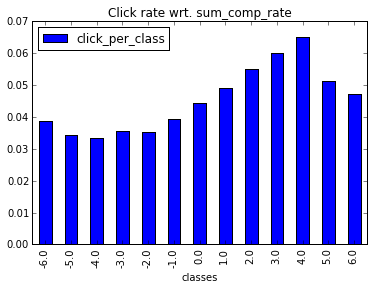

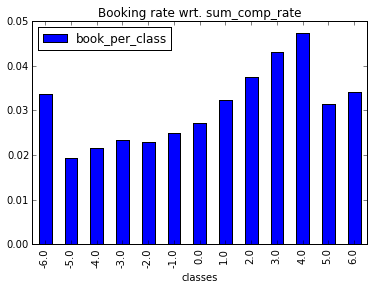

Here the NaN values are classed as -7


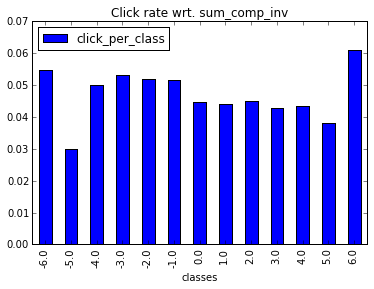

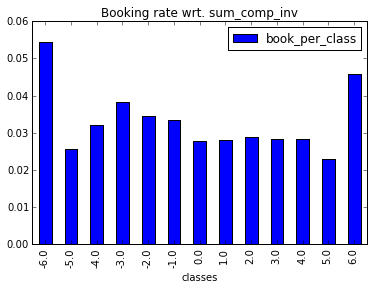

In [21]:
ratedist(training_data, "sum_comp_rate", 1, -7)
ratedist(training_data, "sum_comp_inv", 1, -7)

We can see from the figures of 8 comps, each one have the same distribution.

Therefore, we replace NaN value with 0 value and add all 8 comps together to create the new feature instead of using all 8 comp features.

#### 8. 'orig_destination_distance' feature

NaN value click summary:
count    6701069.000000
mean           0.043918
std            0.204912
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000
Name: click_bool, dtype: float64
NaN value booking summary:
count    6701069.000000
mean           0.027943
std            0.164810
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000
Name: booking_bool, dtype: float64
non_NaN value click summary:
count    3216461.000000
mean           0.046441
std            0.210439
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000
Name: click_bool, dtype: float64
non_NaN value booking summary:
count    3216461.000000
mean           0.027777
std            0.164334
min            0.000000
25%            0.000000
50%            0.000000
75%            0.000000
max            1.000000
Name: booking_bool,

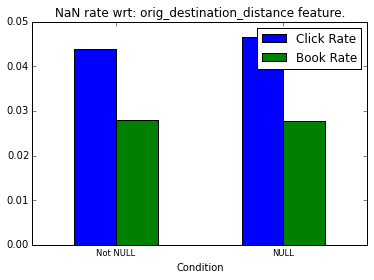

In [ ]:
nanrate(training_data, 'orig_destination_distance')

In [ ]:
ratedist(training_data, "orig_destination_distance", 1000, -1)

From the figure, we can see that there is no significant influence on booking and click rate between non-NaN and NaN samples.

Here we replace NaN value with median value of orig_destination_distance feature.